<a href="https://colab.research.google.com/github/Uday47/How-to-create-a-new-custom-dataset-from-images-Medium-Article/blob/master/Code_Medium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Write images to CSV file

In [3]:
from PIL import Image
import numpy as np
import sys
import os
import csv
# default format can be changed as needed
def createFileList(myDir, format='.jpg'):
    fileList = []
    print(myDir)
    labels = []
    names = []
    keywords = {"K" : "1","U": "0",} # keys and values to be changed as needed
    for root, dirs, files in os.walk(myDir, topdown=True):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
            for keyword in keywords:
                if keyword in name:
                    labels.append(keywords[keyword])
                else:
                    continue
            names.append(name)
    return fileList, labels, names
# load the original image
myFileList, labels, names  = createFileList('/content/Upload/')
i = 0
for file in myFileList:
    print(file)
    img_file = Image.open(file)
    # img_file.show()
# get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode
# Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()
# Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((height , width,))
    value = value.flatten()
    
    value = np.append(value,labels[i])
    i +=1
    
    print(value)
    with open("Keanu&Uday.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)


/content/Upload/
/content/Upload/Keanu  (4).jpg
['195' '197' '199' ... '26' '25' '1']
/content/Upload/Uday(5).jpg
['78' '56' '77' ... '73' '60' '0']
/content/Upload/Uday (2).jpg
['11' '9' '10' ... '191' '193' '0']
/content/Upload/Keanu (5).jpg
['201' '204' '208' ... '140' '139' '1']
/content/Upload/Keanu  (1).jpg
['255' '254' '255' ... '253' '253' '1']
/content/Upload/Uday (1).jpg
['237' '238' '235' ... '103' '114' '0']
/content/Upload/Uday (3).jpg
['232' '232' '232' ... '100' '91' '0']
/content/Upload/Keanu  (3).jpg
['255' '255' '255' ... '8' '8' '1']
/content/Upload/Keanu  (2).jpg
['186' '225' '245' ... '83' '91' '1']
/content/Upload/Uday (4).jpg
['113' '102' '105' ... '99' '62' '0']


###Load the CSV
Note: Load the modified CSV file and not the one that's just been created.


In [4]:
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
 
dataset_path = '/content/Keanu&Uday.csv'
image_size=(48,48) #add 3 if RGB image
 
def load():
    data = pd.read_csv(dataset_path)
    pixels = data['Pixels'].tolist()
    width, height= 48, 48 ,# add depth 3 if RGB image
    faces = []
    for pixel_sequence in pixels:
        face = [int(pixel) for pixel in pixel_sequence.split(' ')]
        face = np.asarray(face).reshape(width, height,) #add depth if RGB image
        a = face
        face = np.resize(face.astype('uint8'),image_size)
        faces.append(face.astype('float32'))

    faces = np.asarray(faces)
    A = faces
    faces = np.expand_dims(faces, -1)
    return faces, A
 
faces,A = load()

###Plot images

<Figure size 432x288 with 0 Axes>

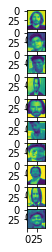

In [5]:
import matplotlib.pyplot as plt
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(A.shape[0],1) 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
for i in range(A.shape[0]):
  axarr[i].imshow(A[i])

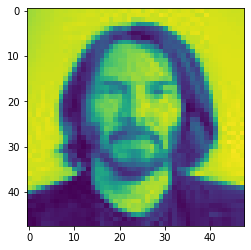

In [6]:
plt.imshow(A[0].astype("uint8")) #change the index to plot different picture